<center> Ryan Reed </center>

<center> COS 422 - Computing for Data Science </center>

<center> Final Project </center>

<center> </center>

**<center> Studying the Relationship Between Economic Factors & Crime Rates in Maine's Metropolitan Areas </center>**

#Project Workflow 
- 1.0 - Problem Definition
- 2.0 - Data Gathering and Import
  - 2.1. Gathering and Importing
  - 2.2. Viewing Data Shapes
  - 2.3. Viewing Subsets of the Data
  - 2.4. Describing Features

- 3.0 - Data Processing and Wrangling
  - 3.1. Filtering Annual Economic Data Years
  - 3.2. Transforming Quarterly Economic Data into Annual
  - 3.3. Transforming Crime Data
  - 3.4. Creating a Unified Dataset

- 4.0 - Exploratory Data Analysis
  - 4.1. Visualizing Economic Features
  - 4.2. Visualizing Crime Features
  - 4.3. Analyzing Feature Relationships
  - 4.4. Visualizing Feature Correlation

- 5.0 - Data Modelling
  - 5.1. Preparing Train & Test Sets
  - 5.2. Multiple Linear Regression
  - 5.3. Ridge Regression
  - 5.4. Random Forest Regression
  - 5.5. Model Summary 

- 6.0 - References

# 1.0. Problem Definition
The relationship between crime rates and economic factors has long been debated. The assertion put forth by economic theory, is that as opportunity and economic growth increase, crime should generally decrease. The issue in studying this relationship, is that crime is not impacted solely by economic factors. To ensure a fair study, non-economic factors must  be considered and minimized, and ultimately the biggest challenge becomes finding a population with ideal parameters. Such metrics can include cultural, age, educational, and wealth demographics.

To find an idealized population is near impossible, as organic populations are never truly heterogeneous in their demographics, but the state of Maine has the closest to 'ideal' parameters for a study of this kind.

The economic factors considered include unemployment rate, per capita personal income, gross domestic product, housing price index, and resident population, all annually representative. The crime rate will be measured as both an overall crime rate, as well as violent and property crime rates, seperately.

Ideally, we wish to uncover a predictive pattern for crime based upon economic statistics on an annual basis, but the ultimate goal is to uncover whether economic factors have a direct effect on crime rates.

Due to the scarcity of data at the individual town level, areas considered are the Portland-South Portland-Biddeford, Lewiston-Auburn, and Bangor metropolitan areas, between the years of 2006-2019.

# 2.0. Data Gathering and Import
In this section, the data is gathered, necessary libraries and tools are imported, and the data is viewed.

## 2.1. Gathering and Importing Data

In [ ]:
# mounting my personal google drive to retrieve the data files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# importing necessary libraries & tools
import numpy as np
import pandas as pd
import datetime as dt
import glob
!pip install --upgrade xlrd
import xlrd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
# declaring strings for the paths to the data files
data_path = '/content/gdrive/MyDrive/final_project_data/'
crime_data_path = '/content/gdrive/MyDrive/final_project_data/crime_years/'

In [ ]:
# handling the annual economic data encompassing per capita personal income,
# resident population, unemployment rate, and total GDP.
annual_eco = pd.read_csv(f'{data_path}Economic_Annual.txt', sep='\t')
annual_eco['DATE'] = pd.to_datetime(annual_eco['DATE']).dt.year

In [ ]:
# handling the quarterly economic data which encompasses the housing price index for the areas.
quart_eco = pd.read_csv(f'{data_path}Economic_Quarterly.txt', sep='\t')
quart_eco['DATE'] = pd.to_datetime(quart_eco['DATE']).dt.year

In [ ]:
# handling the crime data, initially as a list of dfs to accomodate the many files.
crime_data = list()

crime_years = glob.glob(f"{crime_data_path}*")

for file in crime_years:
  df = pd.read_excel(file, skiprows=[0, 1, 2, 3])
  df = df[:-1:]
  while (len(df.columns) > 12):
    df = df.iloc[:,:-1]
  crime_data.append(df)

# this will be resused, but the dictionary below is used to better order and identify
# the crime data.
years = list(range(2006, 2020, +1))
crime_dict = {years[i]:crime_data[i] for i in range(len(years))}

## 2.2. Exploring the structure of the Data and Features
To provide an adqeuate view of the project data, we view the shapes of our data, and view small subsets.

### 2.2.1. Viewing Data Shapes

In [ ]:
print("Annual Economic Data Shape:", annual_eco.shape)
print("Quarterly Economic Data Shape:", quart_eco.shape, '\n')

for year in crime_dict:
  print("Crime Data for", year , " Data Shape:", crime_dict[year].shape)


Annual Economic Data Shape: (53, 13)
Quarterly Economic Data Shape: (162, 4) 

Crime Data for 2006  Data Shape: (112, 12)
Crime Data for 2007  Data Shape: (113, 12)
Crime Data for 2008  Data Shape: (438, 12)
Crime Data for 2009  Data Shape: (113, 12)
Crime Data for 2010  Data Shape: (112, 12)
Crime Data for 2011  Data Shape: (113, 12)
Crime Data for 2012  Data Shape: (114, 12)
Crime Data for 2013  Data Shape: (115, 12)
Crime Data for 2014  Data Shape: (117, 12)
Crime Data for 2015  Data Shape: (114, 12)
Crime Data for 2016  Data Shape: (115, 12)
Crime Data for 2017  Data Shape: (110, 12)
Crime Data for 2018  Data Shape: (110, 12)
Crime Data for 2019  Data Shape: (110, 12)


### 2.2.2. Viewing Subsets of the Data
It is important to keep in mind, in the next section the data is cleaned, so while the shapes of the data differ, and many values are missing, these will soon be rectified properly.


In [ ]:
annual_eco.head()

,DATE,BANG723PCPI,BANPOP,LAUMT237075000000003A,LAUMT237465000000003A,LAUMT237675000000003A,LEWI623PCPI,LWAPOP,NGMP12620,NGMP30340,NGMP38860,PORT723PCPI,PTLPOP
0,1969,2974,NaN,NaN,NaN,NaN,3417,NaN,NaN,NaN,NaN,3704,NaN
1,1970,3282,NaN,NaN,NaN,NaN,3713,NaN,NaN,NaN,NaN,3985,NaN
2,1971,3488,NaN,NaN,NaN,NaN,3773,NaN,NaN,NaN,NaN,4202,NaN
3,1972,3822,NaN,NaN,NaN,NaN,3985,NaN,NaN,NaN,NaN,4562,NaN
4,1973,4185,NaN,NaN,NaN,NaN,4451,NaN,NaN,NaN,NaN,4908,NaN


In [ ]:
quart_eco.head()

,DATE,ATNHPIUS12620Q,ATNHPIUS30340Q,ATNHPIUS38860Q
0,1982,NaN,NaN,51.22
1,1982,NaN,NaN,49.72
2,1982,NaN,NaN,51.55
3,1983,NaN,NaN,51.10
4,1983,NaN,NaN,53.59


In [ ]:
# all of the crime datasets are in the same or similiar format.
crime_dict[2019].head()

,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
0,Ashland,1206.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0
1,Auburn,23214.0,34.0,1.0,13.0,5.0,15.0,511.0,56.0,445.0,10.0,1.0
2,Augusta,18629.0,49.0,0.0,20.0,12.0,17.0,587.0,59.0,519.0,9.0,2.0
3,Baileyville,1442.0,15.0,0.0,1.0,1.0,13.0,11.0,5.0,5.0,1.0,0.0
4,Bangor,31872.0,35.0,1.0,1.0,15.0,18.0,1168.0,64.0,1076.0,28.0,4.0


### 2.2.3. Describing Features
Below are descriptions of the features of the datasets.

In [ ]:
quart_eco_feats = pd.DataFrame({'Description': ['Quarter for the reported housing price index',
                                                'Housing price index for Bangor',
                                                'Housing price index for Lewiston',
                                                'Housing price index for Portland'],
                                'Values': [quart_eco[i].unique() for i in quart_eco.columns],
                                'Number of unique values': [len(quart_eco[i].unique()) for i in quart_eco.columns]},
                                index = quart_eco.columns)
quart_eco_feats

,Description,Values,Number of unique values
DATE,Quarter for the reported housing price index,"[1982, 1983, 1984, 1985, 1986, 1987, 1988, 198...",41
ATNHPIUS12620Q,Housing price index for Bangor,"[nan, 96.91, 100.15, 97.76, 104.67, 100.02, 96...",135
ATNHPIUS30340Q,Housing price index for Lewiston,"[nan, 79.52, 82.58, 89.16, 90.42, 97.04, 101.0...",141
ATNHPIUS38860Q,Housing price index for Portland,"[51.22, 49.72, 51.55, 51.1, 53.59, 55.47, 58.6...",162


In [ ]:
annual_eco_feats = pd.DataFrame({'Description': ['Fiscal year',
                                                'Bangor per capita personal income ($)',
                                                'Bangor resident population (thousands)',
                                                'Bangor unemployment rate (%)',
                                                'Lewiston unemployment rate (%)',
                                                'Portland unemployment rate (%)',
                                                'Lewiston per capita personal income ($)',
                                                'Lewiston resident population (thousands)',
                                                'Bangor total GDP ($ millions)',
                                                'Lewiston total GDP ($ millions)',
                                                'Portland total GDP ($ millions)',
                                                'Portland per capita personal income ($)',
                                                'Portland resident population (thousands)'],
                                'Values': [annual_eco[i].unique() for i in annual_eco.columns],
                                'Number of unique values': [len(annual_eco[i].unique()) for i in annual_eco.columns]},
                                index = annual_eco.columns)
annual_eco_feats

,Description,Values,Number of unique values
DATE,Fiscal year,"[1969, 1970, 1971, 1972, 1973, 1974, 1975, 197...",53
BANG723PCPI,Bangor per capita personal income ($),"[2974, 3282, 3488, 3822, 4185, 4614, 5067, 566...",53
BANPOP,Bangor resident population (thousands),"[nan, 144.907, 145.589, 146.249, 147.123, 146....",23
LAUMT237075000000003A,Bangor unemployment rate (%),"[nan, 5.6, 7.5, 6.6, 6.0, 6.2, 5.5, 4.9, 3.9, ...",25
LAUMT237465000000003A,Lewiston unemployment rate (%),"[nan, 6.9, 9.6, 8.7, 7.4, 6.8, 6.0, 6.1, 5.7, ...",28
LAUMT237675000000003A,Portland unemployment rate (%),"[nan, 4.2, 6.5, 6.0, 5.4, 4.7, 3.8, 3.2, 3.0, ...",28
LEWI623PCPI,Lewiston per capita personal income ($),"[3417, 3713, 3773, 3985, 4451, 4798, 5298, 596...",53
LWAPOP,Lewiston resident population (thousands),"[nan, 103.845, 104.148, 104.873, 105.786, 106....",23
NGMP12620,Bangor total GDP ($ millions),"[nan, 4360.112, 4561.7, 4645.384, 4933.855, 51...",21
NGMP30340,Lewiston total GDP ($ millions),"[nan, 2692.531, 2948.591, 3101.439, 3274.301, ...",21


In [ ]:
# as previously stated, the crime datasets all have the same structure, one example
# will be enough to satisify a description the features

crime_feat = pd.DataFrame({'Description': ['City for reported crimes',
                                            'City population',
                                            'Total count of crimes classified as Violent',
                                            'Count of crimes that fall beneath Murder/Manslaughter',
                                           'Other crimes considered as violent',
                                           'Count of crimes that fall beneath Robbery',
                                           'Count of crimes that fall beneath Aggravated Assault',
                                           'Total count of crimes classified as property-related',
                                           'Count of crimes that fall beneath Burglary',
                                           'Count of crimes that fall beneath Larceny-Theft',
                                           'Count of crimes that fall beneath Motor Vehicle Theft',
                                           'Count of crimes that fall beneath Arson'],
                                'Values': [(crime_dict[2006])[i].unique() for i in (crime_dict[2006]).columns],
                                'Number of unique values': [len((crime_dict[2006])[i].unique()) for i in (crime_dict[2006]).columns]},
                                index = (crime_dict[2006]).columns)
crime_feat

,Description,Values,Number of unique values
City,City for reported crimes,"[Ashland, Auburn, Augusta, Baileyville, Bangor...",112
Population,City population,"[1467.0, 23603.0, 18627.0, 1618.0, 31076.0, 51...",112
Violent crime,Total count of crimes classified as Violent,"[1.0, 23.0, 66.0, 6.0, 52.0, 3.0, 8.0, 12.0, 5...",28
Murder and nonnegligent manslaughter,Count of crimes that fall beneath Murder/Mansl...,"[0.0, 2.0, 1.0, 3.0]",4
Forcible rape,Other crimes considered as violent,"[0.0, 6.0, 22.0, 1.0, 2.0, 19.0, 10.0, 4.0, 5....",15
Robbery,Count of crimes that fall beneath Robbery,"[0.0, 7.0, 13.0, 24.0, 3.0, 1.0, 14.0, 2.0, 4....",14
Aggravated assault,Count of crimes that fall beneath Aggravated A...,"[1.0, 10.0, 31.0, 6.0, 25.0, 3.0, 4.0, 9.0, 20...",20
Property crime,Total count of crimes classified as property-r...,"[8.0, 803.0, 1165.0, 67.0, 1897.0, 38.0, 309.0...",98
Burglary,Count of crimes that fall beneath Burglary,"[4.0, 142.0, 198.0, 18.0, 216.0, 15.0, 36.0, 3...",56
Larceny-theft,Count of crimes that fall beneath Larceny-Theft,"[2.0, 632.0, 926.0, 48.0, 1633.0, 21.0, 265.0,...",92


From the tables above, we can observe the following for the datasets:


*   Annual Economic Data
  *   In this dataset, we are dealing with no categorical features, only numerical.
  *   Due to the ranges of data, they are not uniformly reported for the same years, for instance the data for per capita personal income for each area has data for the years 1963-2020, while the others have data ranging from the early 2000's to 2020.


*   Quarterly Economic Data
  *   Once again, we are dealing with no categorical features, only numerical.
  *   A similiar issue as with the annual economic data, the housing price indexes for each of the three areas was not conducted uniformly over the same years.



*   Crime Data
  *   The dataset has one nominal categorical feature, the cities in which the crimes are reported.
  *   The violent crime and property crime features are sums of the crime features depending on how the crimes are classified.
  *  Violent crimes include the murder/manslaughter, robbery, aggravated assault, and other categories.
  *  Property crimes include burglary, motor vehicle theft, arson, and larceny-theft.





# 3.0. Data Processing & Wrangling

## 3.1. Filtering the Years of the Economic Data
Our project only has concrete data for the years 2006-2019, so the economic data must be filtered to fit the appropriate time range, as well as to make the data uniform as each economic dataset used has differing recorded years.

In [ ]:
annual_eco = annual_eco.loc[(annual_eco['DATE'] >= 2006) & (annual_eco['DATE'] <= 2019)]
annual_eco.head()

,DATE,BANG723PCPI,BANPOP,LAUMT237075000000003A,LAUMT237465000000003A,LAUMT237675000000003A,LEWI623PCPI,LWAPOP,NGMP12620,NGMP30340,NGMP38860,PORT723PCPI,PTLPOP
37,2006,30103,148.197,4.7,4.7,3.5,30836,106.971,5304.131,3524.866,22942.558,40039,512.073
38,2007,31196,148.603,4.7,4.6,3.5,32369,106.695,5462.341,3749.462,23600.482,41405,513.791
39,2008,32557,149.268,5.2,5.4,4.2,33633,107.061,5410.995,3877.941,23859.239,42823,516.026
40,2009,33367,149.419,7.8,8.7,6.9,33672,106.539,5571.966,3786.188,24268.556,42177,516.826
41,2010,33530,153.864,8.1,8.9,7.0,34096,107.712,5611.361,3784.803,24695.067,43546,513.925


In [ ]:
quart_eco = quart_eco.loc[(quart_eco['DATE'] >= 2006) & (quart_eco['DATE'] <= 2019)]
quart_eco.head()

,DATE,ATNHPIUS12620Q,ATNHPIUS30340Q,ATNHPIUS38860Q
95,2006,188.28,205.33,236.39
96,2006,187.38,197.22,234.62
97,2006,190.12,200.17,234.88
98,2006,196.02,201.88,237.08
99,2007,194.98,201.75,239.41


## 3.2. Transforming Quarterly Economic Data into Annual Economic Data
Ultimately, the goal is to have one complete dataset, and for this reasoning, the quarterly economic data needs to be merged into the annual dataset

In [ ]:
temp = quart_eco.groupby("DATE").mean()
eco_data = pd.merge(annual_eco, temp, how='right', on=['DATE'])
eco_data

,DATE,BANG723PCPI,BANPOP,LAUMT237075000000003A,LAUMT237465000000003A,LAUMT237675000000003A,LEWI623PCPI,LWAPOP,NGMP12620,NGMP30340,NGMP38860,PORT723PCPI,PTLPOP,ATNHPIUS12620Q,ATNHPIUS30340Q,ATNHPIUS38860Q
0,2006,30103,148.197,4.7,4.7,3.5,30836,106.971,5304.131,3524.866,22942.558,40039,512.073,190.4500,201.1500,235.7425
1,2007,31196,148.603,4.7,4.6,3.5,32369,106.695,5462.341,3749.462,23600.482,41405,513.791,195.5300,203.0525,237.4875
2,2008,32557,149.268,5.2,5.4,4.2,33633,107.061,5410.995,3877.941,23859.239,42823,516.026,193.8625,198.1925,231.9025
3,2009,33367,149.419,7.8,8.7,6.9,33672,106.539,5571.966,3786.188,24268.556,42177,516.826,188.0575,186.4025,221.9800
4,2010,33530,153.864,8.1,8.9,7.0,34096,107.712,5611.361,3784.803,24695.067,43546,513.925,182.4900,180.7400,214.3900
5,2011,34865,153.781,7.3,8.0,6.4,34932,107.458,5577.760,3810.991,25022.965,45501,516.159,177.9575,175.0775,210.4125
6,2012,35222,153.392,6.8,7.5,5.9,35487,107.517,5619.131,4032.657,25853.311,46691,517.816,174.5175,171.4900,208.8600
7,2013,35306,153.289,6.3,6.7,5.6,35098,107.267,5711.447,4039.334,26215.748,46623,520.251,174.2125,172.6150,210.9925
8,2014,36388,153.288,5.3,5.4,4.5,35889,107.411,5854.862,4157.106,27261.546,48379,524.338,176.7600,172.9225,215.3200
9,2015,37946,152.029,4.2,4.2,3.5,37461,107.189,5977.833,4308.155,28181.844,50546,526.248,176.7625,174.5875,223.8650


## 3.3. Transforming Crime Data


I took the liberty of manually compiling the towns and cities within each metropolitan area under study. These can be use to filter the cities and remove unnecessary entries.

In [ ]:
area_dict = {'Lewiston': list(open(f'{data_path}lewiston_area.txt').read().splitlines()),
             'Portland': list(open(f'{data_path}portland_area.txt').read().splitlines()),
             'Bangor': list(open(f'{data_path}bangor_area.txt').read().splitlines())}
# flattening area_dict
area_dict_A = {val:key for key, lst in area_dict.items() for val in lst}

all_areas = list()
for area in area_dict:
  all_areas = all_areas + area_dict[area]
# below will be commented out, but can be uncommented to show the towns of each
# metropolitan area in different formats.
# area_dict
# all_areas
# area_dict_A

Before the crime data is processed into a more usable format, a major challenge lies in the way, namely that the columns must be renamed manually, as there exists many alterations between the years that the FBI collected data from law enforcement agencies.

In [ ]:
temp = dict()
for x in crime_dict:
  df = crime_dict[x]
  df.columns = ['City', 'Population', 'Violent Crime', 'Murder/Manslaughter',
                'Other', 'Robbery', 'Aggravated Assault', 'Property Crime',
                'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson']
  temp[x] = df
crime_dict = temp

Now unncessary city & town entries are filtered out, and relevant cities & towns are combined into metropolitian 'bins'. Most importantly, we attach years to each dataset, giving us what we need for simple merging.

In [ ]:
cleaned_crime_data = list()
for crime_year in crime_dict:
  temp = crime_dict[crime_year][['City', 'Violent Crime', 'Property Crime']]
  temp = temp[temp['City'].isin(all_areas)].reset_index(drop=True)
  temp['City'] = temp['City'].map(area_dict_A)
  temp = temp.groupby('City').aggregate('sum')
  temp['DATE'] = crime_year
  cleaned_crime_data.append(temp)
temp.head() # one example of the work performed

,Violent Crime,Property Crime,DATE
City,,,
Bangor,62.0,2059.0,2019
Lewiston,173.0,1354.0,2019
Portland,547.0,5832.0,2019


In [ ]:
crime_data_combined = pd.concat(cleaned_crime_data)
crime_data_combined = crime_data_combined.reset_index()
crime_data_combined.head()

,City,Violent Crime,Property Crime,DATE
0,Bangor,90.0,3208.0,2006
1,Lewiston,128.0,2304.0,2006
2,Portland,623.0,11852.0,2006
3,Bangor,77.0,3349.0,2007
4,Lewiston,142.0,2275.0,2007


Below are functions used for seperating the violent and property crimes appropriately for each area under study.

In [ ]:
def seper_violent(area, row):
  if area == 'Bangor':
    if row['City'] == 'Bangor':
      return row['Violent Crime']
    else:
      return 0
  elif area == 'Lewiston':
    if row['City'] == 'Lewiston':
      return row['Violent Crime']
    else:
      return 0
  else:
    if row['City'] == 'Portland':
      return row['Violent Crime']
    else:
      return 0

In [ ]:
def seper_prop(area, row):
  if area == 'Bangor':
    if row['City'] == 'Bangor':
      return row['Property Crime']
    else:
      return 0
  elif area == 'Lewiston':
    if row['City'] == 'Lewiston':
      return row['Property Crime']
    else:
      return 0
  else:
    if row['City'] == 'Portland':
      return row['Property Crime']
    else:
      return 0

In [ ]:
crime_data_combined['Bangor VC'] = crime_data_combined.apply(lambda row: seper_violent('Bangor',row), axis=1)
crime_data_combined['Lewiston VC'] = crime_data_combined.apply(lambda row: seper_violent('Lewiston',row), axis=1)
crime_data_combined['Portland VC'] = crime_data_combined.apply(lambda row: seper_violent('Portland',row), axis=1)

crime_data_combined['Bangor PC'] = crime_data_combined.apply(lambda row: seper_prop('Bangor',row), axis=1)
crime_data_combined['Lewiston PC'] = crime_data_combined.apply(lambda row: seper_prop('Lewiston',row), axis=1)
crime_data_combined['Portland PC'] = crime_data_combined.apply(lambda row: seper_prop('Portland',row), axis=1)
crime_data_combined = crime_data_combined.drop(['City', 'Violent Crime', 'Property Crime'], axis=1)


crime_data_combined = crime_data_combined.groupby(crime_data_combined['DATE']).aggregate({'Bangor VC': 'sum', 'Lewiston VC': 'sum', 'Portland VC': 'sum',
                                                                                          'Bangor PC': 'sum', 'Lewiston PC': 'sum', 'Portland PC': 'sum'})

crime_data_combined.head()

,Bangor VC,Lewiston VC,Portland VC,Bangor PC,Lewiston PC,Portland PC
DATE,,,,,,
2006,90.0,128.0,623.0,3208.0,2304.0,11852.0
2007,77.0,142.0,598.0,3349.0,2275.0,11092.0
2008,96.0,149.0,615.0,3458.0,2117.0,10768.0
2009,103.0,135.0,602.0,3764.0,2200.0,10580.0
2010,83.0,149.0,608.0,3333.0,2255.0,10778.0


## 3.4. Creating a Unified Dataset
With crime data now in an acceptable format, we can combine all of our data into a singular dataset

In [ ]:
data = crime_data_combined.merge(eco_data, on=['DATE'])
data = data.set_index('DATE')
data.head()

,Bangor VC,Lewiston VC,Portland VC,Bangor PC,Lewiston PC,Portland PC,BANG723PCPI,BANPOP,LAUMT237075000000003A,LAUMT237465000000003A,...,LEWI623PCPI,LWAPOP,NGMP12620,NGMP30340,NGMP38860,PORT723PCPI,PTLPOP,ATNHPIUS12620Q,ATNHPIUS30340Q,ATNHPIUS38860Q
DATE,,,,,,,,,,,,,,,,,,,,,
2006,90.0,128.0,623.0,3208.0,2304.0,11852.0,30103,148.197,4.7,4.7,...,30836,106.971,5304.131,3524.866,22942.558,40039,512.073,190.4500,201.1500,235.7425
2007,77.0,142.0,598.0,3349.0,2275.0,11092.0,31196,148.603,4.7,4.6,...,32369,106.695,5462.341,3749.462,23600.482,41405,513.791,195.5300,203.0525,237.4875
2008,96.0,149.0,615.0,3458.0,2117.0,10768.0,32557,149.268,5.2,5.4,...,33633,107.061,5410.995,3877.941,23859.239,42823,516.026,193.8625,198.1925,231.9025
2009,103.0,135.0,602.0,3764.0,2200.0,10580.0,33367,149.419,7.8,8.7,...,33672,106.539,5571.966,3786.188,24268.556,42177,516.826,188.0575,186.4025,221.9800
2010,83.0,149.0,608.0,3333.0,2255.0,10778.0,33530,153.864,8.1,8.9,...,34096,107.712,5611.361,3784.803,24695.067,43546,513.925,182.4900,180.7400,214.3900


Renaming columns for transparency

In [ ]:
data = data.rename(columns= {'ATNHPIUS12620Q':'Bangor HPI',
                              'ATNHPIUS30340Q':'Lewiston HPI',
                              'ATNHPIUS38860Q':'Portland HPI',
                              'BANG723PCPI':'Bangor PI',
                              'BANPOP': 'Bangor pop', 'LAUMT237075000000003A': 'Bangor UR',
                              'LAUMT237465000000003A': 'Lewiston UR', 'LAUMT237675000000003A': 'Portland UR',
                              'LEWI623PCPI': 'Lewiston PI', 'LWAPOP': 'Lewiston pop',
                              'NGMP12620': 'Bangor GDP', 'NGMP30340': 'Lewiston GDP',
                              'NGMP38860': 'Portland GDP', 'PORT723PCPI': 'Portland PI',
                              'PTLPOP': 'Portland pop'})
data.head()

,Bangor VC,Lewiston VC,Portland VC,Bangor PC,Lewiston PC,Portland PC,Bangor PI,Bangor pop,Bangor UR,Lewiston UR,...,Lewiston PI,Lewiston pop,Bangor GDP,Lewiston GDP,Portland GDP,Portland PI,Portland pop,Bangor HPI,Lewiston HPI,Portland HPI
DATE,,,,,,,,,,,,,,,,,,,,,
2006,90.0,128.0,623.0,3208.0,2304.0,11852.0,30103,148.197,4.7,4.7,...,30836,106.971,5304.131,3524.866,22942.558,40039,512.073,190.4500,201.1500,235.7425
2007,77.0,142.0,598.0,3349.0,2275.0,11092.0,31196,148.603,4.7,4.6,...,32369,106.695,5462.341,3749.462,23600.482,41405,513.791,195.5300,203.0525,237.4875
2008,96.0,149.0,615.0,3458.0,2117.0,10768.0,32557,149.268,5.2,5.4,...,33633,107.061,5410.995,3877.941,23859.239,42823,516.026,193.8625,198.1925,231.9025
2009,103.0,135.0,602.0,3764.0,2200.0,10580.0,33367,149.419,7.8,8.7,...,33672,106.539,5571.966,3786.188,24268.556,42177,516.826,188.0575,186.4025,221.9800
2010,83.0,149.0,608.0,3333.0,2255.0,10778.0,33530,153.864,8.1,8.9,...,34096,107.712,5611.361,3784.803,24695.067,43546,513.925,182.4900,180.7400,214.3900


## 3.5. Feature Engineering
In this section, new features are created from the existing features. Namely:
1. Yearly total crimes (TCR)
2. Yearly crime rate per 1,000 people (YCR)
3. Per capita property crimes (PCPC)
4. Per capita violent crimes (PCVC)
5. Per capita gross domestic product (PCGDP)

Before we introduce these values, we handle a discrepancy in the FBI records. For 2016, the crimes in the Bangor Metropolitan Area were not reported to the FBI, and changing metholodogy caused errors in reporting for property crimes between the years of 2013 through 2016.

In [ ]:
data.at[2016,'Bangor VC'] = round(data['Bangor VC'].mean())
data['Bangor PC'].where(data['Bangor PC'] > 1000, data['Bangor PC'].mean(), inplace=True)
data['Lewiston PC'].where(data['Lewiston PC'] > 1000, data['Lewiston PC'].mean(), inplace=True)
data['Portland PC'].where(data['Portland PC'] > 1000, data['Portland PC'].mean(), inplace=True)

In [ ]:
data['Bangor TCR'] = data['Bangor VC'] + data['Bangor PC']
data['Lewiston TCR'] = data['Lewiston VC'] + data['Lewiston PC']
data['Portland TCR'] = data['Portland VC'] + data['Portland PC']

data['Bangor YCR'] = (data['Bangor TCR'] / (data['Bangor pop']))
data['Lewiston YCR'] = (data['Lewiston TCR'] / (data['Lewiston pop']))
data['Portland YCR'] = (data['Portland TCR'] / (data['Portland pop']))

data['Bangor PCPC'] = (data['Bangor PC'] / (data['Bangor pop'] * 1000))
data['Lewiston PCPC'] = (data['Lewiston PC'] / (data['Lewiston pop'] * 1000))
data['Portland PCPC'] = (data['Portland PC'] / (data['Portland pop'] * 1000))

data['Bangor PCVC'] = (data['Bangor VC'] / (data['Bangor pop'] * 1000))
data['Lewiston PCVC'] = (data['Lewiston VC'] / (data['Lewiston pop'] * 1000))
data['Portland PCVC'] = (data['Portland VC'] / (data['Portland pop'] * 1000))

data['Bangor PCGDP'] = (data['Bangor GDP'] / (data['Bangor pop'] * 100))
data['Lewiston PCGDP'] = (data['Lewiston GDP'] / (data['Lewiston pop'] * 100))
data['Portland PCGDP'] = (data['Portland GDP'] / (data['Portland pop'] * 100))
data

,Bangor VC,Lewiston VC,Portland VC,Bangor PC,Lewiston PC,Portland PC,Bangor PI,Bangor pop,Bangor UR,Lewiston UR,...,Portland YCR,Bangor PCPC,Lewiston PCPC,Portland PCPC,Bangor PCVC,Lewiston PCVC,Portland PCVC,Bangor PCGDP,Lewiston PCGDP,Portland PCGDP
DATE,,,,,,,,,,,,,,,,,,,,,
2006,90.0,128.0,623.0,3208.000000,2304.000000,11852.000000,30103,148.197,4.7,4.7,...,24.361761,0.021647,0.021539,0.023145,0.000607,0.001197,0.001217,0.357911,0.329516,0.448033
2007,77.0,142.0,598.0,3349.000000,2275.000000,11092.000000,31196,148.603,4.7,4.6,...,22.752442,0.022537,0.021322,0.021589,0.000518,0.001331,0.001164,0.367579,0.351419,0.459340
2008,96.0,149.0,615.0,3458.000000,2117.000000,10768.000000,32557,149.268,5.2,5.4,...,22.058966,0.023166,0.019774,0.020867,0.000643,0.001392,0.001192,0.362502,0.362218,0.462365
2009,103.0,135.0,602.0,3764.000000,2200.000000,10580.000000,33367,149.419,7.8,8.7,...,21.635908,0.025191,0.020650,0.020471,0.000689,0.001267,0.001165,0.372909,0.355380,0.469569
2010,83.0,149.0,608.0,3333.000000,2255.000000,10778.000000,33530,153.864,8.1,8.9,...,22.154984,0.021662,0.020935,0.020972,0.000539,0.001383,0.001183,0.364696,0.351382,0.480519
2011,95.0,137.0,585.0,2967.000000,2814.000000,11078.000000,34865,153.781,7.3,8.0,...,22.595751,0.019294,0.026187,0.021462,0.000618,0.001275,0.001133,0.362708,0.354649,0.484792
2012,108.0,142.0,604.0,3405.000000,2892.000000,11049.000000,35222,153.392,6.8,7.5,...,22.504133,0.022198,0.026898,0.021338,0.000704,0.001321,0.001166,0.366325,0.375072,0.499276
2013,109.0,140.0,659.0,2131.571429,1552.285714,6899.857143,35306,153.289,6.3,6.7,...,14.529251,0.013906,0.014471,0.013263,0.000711,0.001305,0.001267,0.372593,0.376568,0.503906
2014,88.0,132.0,574.0,2131.571429,1552.285714,6899.857143,36388,153.288,5.3,5.4,...,14.253892,0.013906,0.014452,0.013159,0.000574,0.001229,0.001095,0.381952,0.387028,0.519923


## 3.6. Handling Missing Data
The only thing left to do is to check for missing data, as all of the data is already in appropriate data types.

In [ ]:
data.isnull().values.any()

False

With no missing data, that completes the data preparation.

# 4.0. Exploratory Data Analysis
In this section, we perform investigations based upon visualization of our data. This is primarily how we will be identifying the relationship between the economic factors, and the crimes, for the metropolitan areas.

##4.1. Visualizing Economic Data

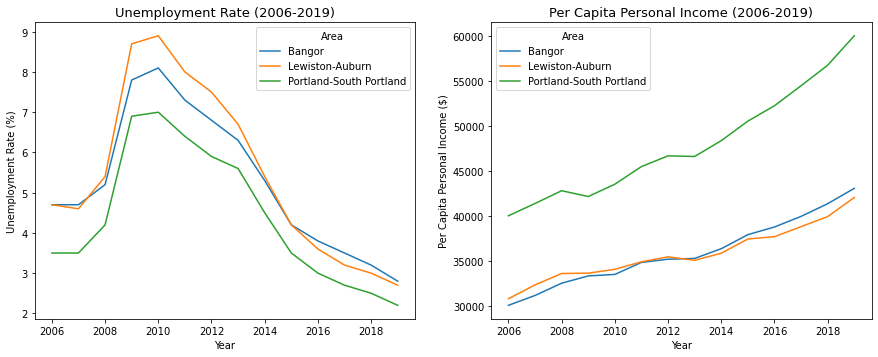

In [ ]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
temp = sns.lineplot(x='DATE', y='Bangor UR', data=data)
temp2 = sns.lineplot(x='DATE', y='Lewiston UR', data=data)
temp3 = sns.lineplot(x='DATE', y='Portland UR', data=data)
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.title('Unemployment Rate (2006-2019)', size=13)
ax1.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')

ax2 = plt.subplot(222)
temp = sns.lineplot(x='DATE', y='Bangor PI', data=data)
temp2 = sns.lineplot(x='DATE', y='Lewiston PI', data=data)
temp3 = sns.lineplot(x='DATE', y='Portland PI', data=data)
plt.ylabel('Per Capita Personal Income ($)')
plt.xlabel('Year')
plt.title('Per Capita Personal Income (2006-2019)', size=13)
ax2.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')
plt.show()

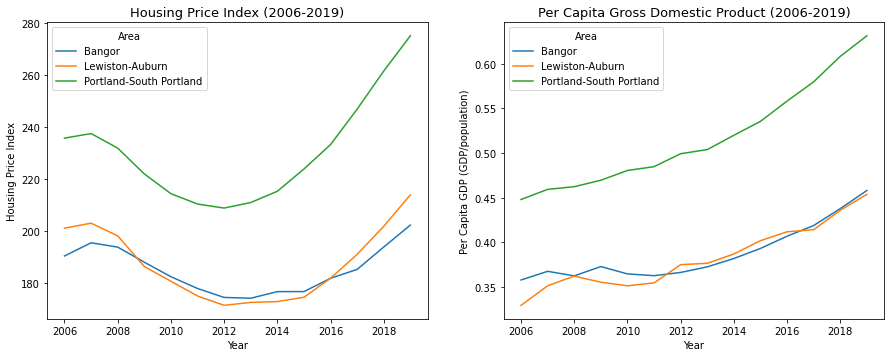

In [ ]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
temp = sns.lineplot(x='DATE', y='Bangor HPI', data=data)
temp2 = sns.lineplot(x='DATE', y='Lewiston HPI', data=data)
temp3 = sns.lineplot(x='DATE', y='Portland HPI', data=data)
plt.ylabel('Housing Price Index')
plt.xlabel('Year')
plt.title('Housing Price Index (2006-2019)', size=13)
ax1.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')

ax2 = plt.subplot(222)
temp = sns.lineplot(x='DATE', y='Bangor PCGDP', data=data)
temp2 = sns.lineplot(x='DATE', y='Lewiston PCGDP', data=data)
temp3 = sns.lineplot(x='DATE', y='Portland PCGDP', data=data)
plt.ylabel('Per Capita GDP (GDP/population)')
plt.xlabel('Year')
plt.title('Per Capita Gross Domestic Product (2006-2019)', size=13)
ax2.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')
plt.show()

## 4.2. Visualizing Crime Data

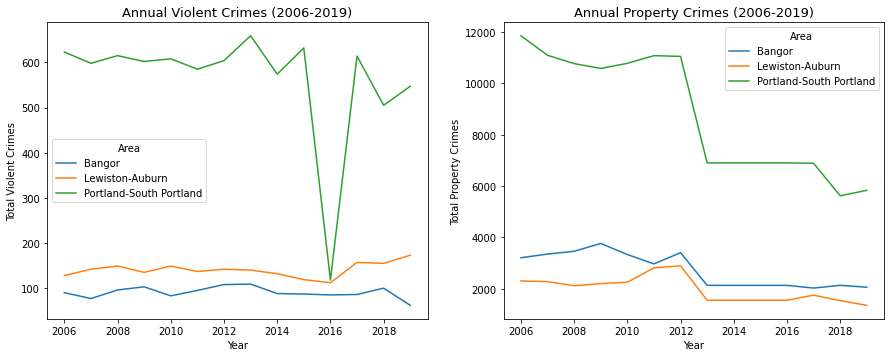

In [ ]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
temp = sns.lineplot(x='DATE', y='Bangor VC', data=data)
temp2 = sns.lineplot(x='DATE', y='Lewiston VC', data=data)
temp3 = sns.lineplot(x='DATE', y='Portland VC', data=data)
plt.ylabel('Total Violent Crimes')
plt.xlabel('Year')
plt.title('Annual Violent Crimes (2006-2019)', size=13)
ax1.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')

ax2 = plt.subplot(222)
temp = sns.lineplot(x='DATE', y='Bangor PC', data=data)
temp2 = sns.lineplot(x='DATE', y='Lewiston PC', data=data)
temp3 = sns.lineplot(x='DATE', y='Portland PC', data=data)
plt.ylabel('Total Property Crimes')
plt.xlabel('Year')
plt.title('Annual Property Crimes (2006-2019)', size=13)
ax2.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')
plt.show()

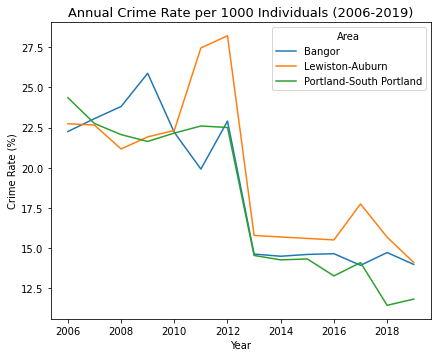

In [ ]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
temp = sns.lineplot(x='DATE', y='Bangor YCR', data=data)
temp2 = sns.lineplot(x='DATE', y='Lewiston YCR', data=data)
temp3 = sns.lineplot(x='DATE', y='Portland YCR', data=data)
plt.ylabel('Crime Rate (%)')
plt.xlabel('Year')
plt.title('Annual Crime Rate per 1000 Individuals (2006-2019)', size=13)
ax1.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')

##4.3. Visualizing Relationships
In this portion of the project, we seek to uncover any relationships between crime and economic factors based upon visual analysis.

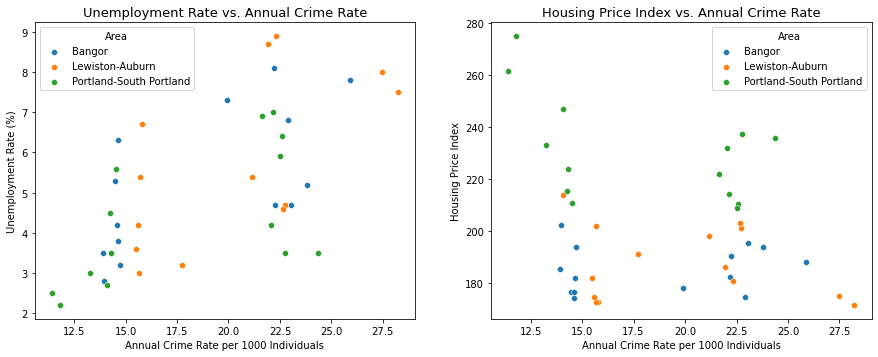

In [ ]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
temp = sns.scatterplot(x='Bangor YCR', y='Bangor UR', data=data)
temp2 = sns.scatterplot(x='Lewiston YCR', y='Lewiston UR', data=data)
temp3 = sns.scatterplot(x='Portland YCR', y='Portland UR', data=data)
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Annual Crime Rate per 1000 Individuals')
plt.title('Unemployment Rate vs. Annual Crime Rate', size=13)
ax1.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')

ax2 = plt.subplot(222)
temp = sns.scatterplot(x='Bangor YCR', y='Bangor HPI', data=data)
temp2 = sns.scatterplot(x='Lewiston YCR', y='Lewiston HPI', data=data)
temp3 = sns.scatterplot(x='Portland YCR', y='Portland HPI', data=data)
plt.ylabel('Housing Price Index')
plt.xlabel('Annual Crime Rate per 1000 Individuals')
plt.title('Housing Price Index vs. Annual Crime Rate', size=13)
ax2.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')
plt.show()

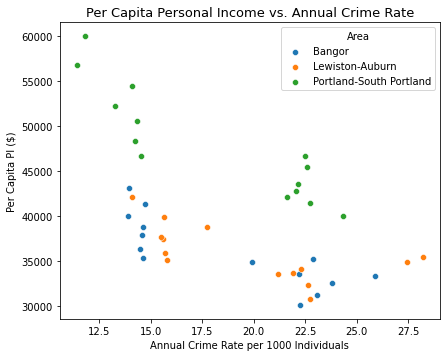

In [ ]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
temp = sns.scatterplot(x='Bangor YCR', y='Bangor PI', data=data)
temp2 = sns.scatterplot(x='Lewiston YCR', y='Lewiston PI', data=data)
temp3 = sns.scatterplot(x='Portland YCR', y='Portland PI', data=data)
plt.ylabel('Per Capita PI ($)')
plt.xlabel('Annual Crime Rate per 1000 Individuals')
plt.title('Per Capita Personal Income vs. Annual Crime Rate', size=13)
ax1.legend(['Bangor', 'Lewiston-Auburn', 'Portland-South Portland'], title='Area')


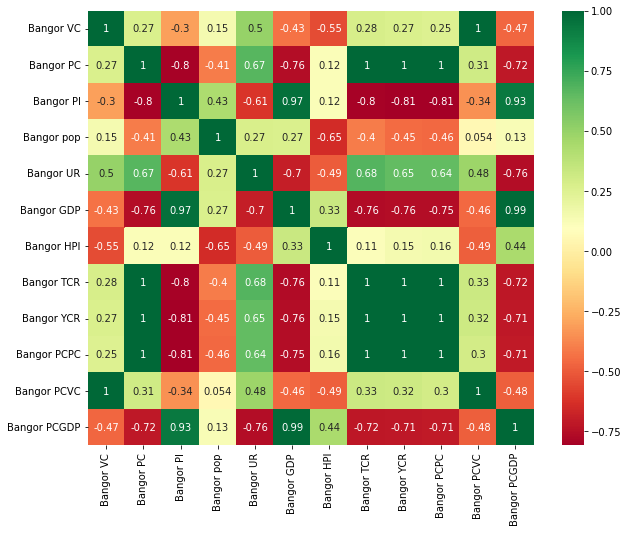

In [ ]:
plt.figure(figsize=(10,8))
bangor_data = data.filter(regex="Bangor")
lewiston_data = data.filter(regex="Lewiston")
portland_data = data.filter(regex="Portland")
corr_b = bangor_data.corr()
sns.heatmap(corr_b, cmap='RdYlGn', annot=True)

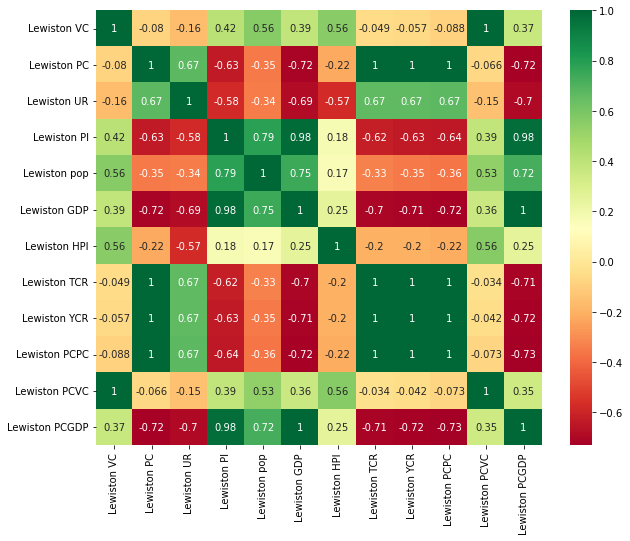

In [ ]:
plt.figure(figsize=(10,8))
corr_l = lewiston_data.corr()
sns.heatmap(corr_l, cmap='RdYlGn', annot=True)

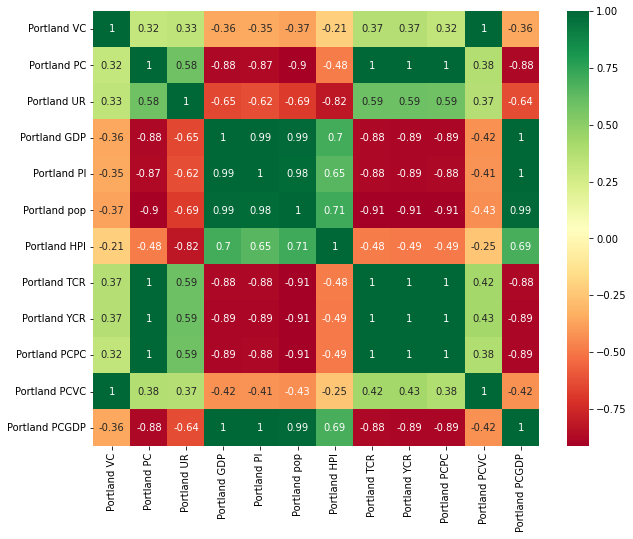

In [ ]:
plt.figure(figsize=(10,8))
corr_p = portland_data.corr()
sns.heatmap(corr_p, cmap='RdYlGn', annot=True)

Through visualizing the correlation between our values, we succeed in discovering a relationship. **Unemployment rates** generally have a strong positive correlation with crime rates, so the study was successful in proving the relation of at least one direct factor that affects crime rates. GDP, Per Capita Personal Income, and population all have strongly associated negative correlations. Housing price index has a moderate negative association.

# 5.0. Data Modelling

## 5.1. Creating Train & Test Sets
We form train and test sets by seperating the data appropriately.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor

data_copy = data
data_copy.head()

,Bangor VC,Lewiston VC,Portland VC,Bangor PC,Lewiston PC,Portland PC,Bangor PI,Bangor pop,Bangor UR,Lewiston UR,...,Portland YCR,Bangor PCPC,Lewiston PCPC,Portland PCPC,Bangor PCVC,Lewiston PCVC,Portland PCVC,Bangor PCGDP,Lewiston PCGDP,Portland PCGDP
DATE,,,,,,,,,,,,,,,,,,,,,
2006,90.0,128.0,623.0,3208.0,2304.0,11852.0,30103,148.197,4.7,4.7,...,24.361761,0.021647,0.021539,0.023145,0.000607,0.001197,0.001217,0.357911,0.329516,0.448033
2007,77.0,142.0,598.0,3349.0,2275.0,11092.0,31196,148.603,4.7,4.6,...,22.752442,0.022537,0.021322,0.021589,0.000518,0.001331,0.001164,0.367579,0.351419,0.459340
2008,96.0,149.0,615.0,3458.0,2117.0,10768.0,32557,149.268,5.2,5.4,...,22.058966,0.023166,0.019774,0.020867,0.000643,0.001392,0.001192,0.362502,0.362218,0.462365
2009,103.0,135.0,602.0,3764.0,2200.0,10580.0,33367,149.419,7.8,8.7,...,21.635908,0.025191,0.020650,0.020471,0.000689,0.001267,0.001165,0.372909,0.355380,0.469569
2010,83.0,149.0,608.0,3333.0,2255.0,10778.0,33530,153.864,8.1,8.9,...,22.154984,0.021662,0.020935,0.020972,0.000539,0.001383,0.001183,0.364696,0.351382,0.480519


Preparing the data for modelling

In [ ]:
targets = data_copy.filter(regex='Portland YCR')
data_copy = data_copy[data_copy.columns.drop(list(data_copy.filter(regex='Lewiston')))]
data_copy = data_copy[data_copy.columns.drop(list(data_copy.filter(regex='Bangor')))]
data_copy = data_copy[data_copy.columns.drop(list(data_copy.filter(regex='YCR')))]
data_copy = data_copy[data_copy.columns.drop(list(data_copy.filter(regex='VC')))]
data_copy = data_copy.drop('Portland PC', axis=1)
data_copy = data_copy[data_copy.columns.drop(list(data_copy.filter(regex='Portland PCPC')))]
data_copy = data_copy[data_copy.columns.drop(list(data_copy.filter(regex='TCR')))]
data_copy.head()

,Portland UR,Portland GDP,Portland PI,Portland pop,Portland HPI,Portland PCGDP
DATE,,,,,,
2006,3.5,22942.558,40039,512.073,235.7425,0.448033
2007,3.5,23600.482,41405,513.791,237.4875,0.459340
2008,4.2,23859.239,42823,516.026,231.9025,0.462365
2009,6.9,24268.556,42177,516.826,221.9800,0.469569
2010,7.0,24695.067,43546,513.925,214.3900,0.480519


In [ ]:
X = data_copy
y = targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 5.2. Linear Regression
Here we use a linear regression model to predict the annual crime rate for the Portland-south portland-biddeford statistical area.

Linear regression attempts to form a predictive relationship between an n number of independent variables, in the case of this project: economic factors, and a single dependent variable, or the target which is the annual crime rate. Essentially, the model looks to find an equation using the economic features to compute the annual crime rate.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
print("Multiple Linear Regression Results",
      "\nMean Squared Error: ", mean_squared_error(y_test, pred),
      "\nMean Absolute Error: ", mean_absolute_error(y_test, pred))

Multiple Linear Regression Results 
Mean Squared Error:  34.9673713211608 
Mean Absolute Error:  4.818587950578688


## 5.3. Ridge Regression
Similiar to linear regression, here we attempt to use ridge regression to predict annual crime rates for the portland-south portland-biddeford statistical area.

The major reasoning for demonstrating the usage of ridge regression and linear regression, is that our features are highly correlated, and thus linear regression will be massively affected by multicollinearity. Ridge regression attempts to minimize the effects of high correlation between features.



In [ ]:
model_rid = Ridge(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=7, random_state=1)
scores = cross_val_score(model_rid, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)

print('Ridge Regression Results:',
      '\nMean Absolute Error:', (mean(scores)))

Ridge Regression Results: 
Mean Absolute Error: 1.6695813621707047


## 5.4. Random Forest Regressor
Similiarly, here we use a random forest regression model to predict the annual crime rates for the portland-south portland-biddeford statistical area.

Random forest regression generates random subsets of features and creates a specified number of decision trees (in the usage below, 1000 decision trees). The decision trees are averaged individually, and the most frequently appearing generation will yield the predicted value, in our case, the annual crime rate.

In [ ]:
model_forest = RandomForestRegressor(n_estimators = 1000, max_depth=6, random_state = 1)
model_forest.fit(X_train, y_train)

pred = model_forest.predict(X_test)
print('Random Forest Regression Results:',
      '\nMean Absolute Error:', mean_absolute_error(y_test, pred))

<ipython-input-127-45e399e076f5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train, y_train)


Random Forest Regression Results: 
Mean Absolute Error: 1.4696091610429014


## 5.5. Modelling Conclusion
Of the regression models used to predict Portland's yearly crime rate, the random forest regression model performed the best with a mean absolute error rate of about 1.47%. The crime rate for Portland generally falls between the range of 18-26%, so this is a marginally effective prediction model. 

Ridge regression performed slightly behind the random forest regression model with a difference in mean absolute error of around +0.20%, and linear regression performed the worst with an increase in mean absolute error with a difference of around ~(+3.15%) from Ridge Regression.

# 6.0. References
1. https://fredaccount.stlouisfed.org/datalists/290328 (economic datasets)
2. https://www.fbi.gov/how-we-can-help-you/need-an-fbi-service-or-more-information/ucr/publications (historical publications 2006-2019)
3. https://colab.research.google.com/github/usm-cos422-522/courseMaterials/blob/main/Labs/titanic-workflow.ipynb#scrollTo=i5Hia6JhcWOB (project structure)
4. https://machinelearningmastery.com/ridge-regression-with-python/ (General Ridge Regression Code)
5. https://www.ibm.com/cloud/learn/random-forest (Random forest regression explanation)
